In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

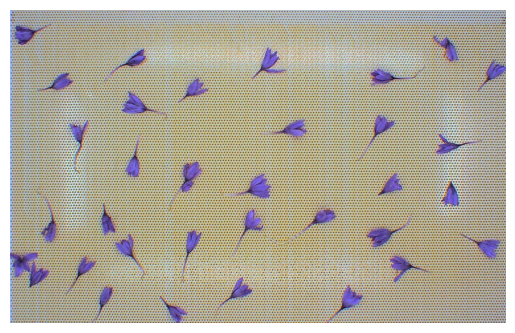

In [2]:
image_saffrun = cv2.imread('saffrun.jpg')
image_saffrun_gray = cv2.imread('saffrun.jpg', cv2.IMREAD_GRAYSCALE)
image_saffrun_rgb = cv2.cvtColor(image_saffrun, cv2.COLOR_BGR2RGB)
    
# Display the image using matplotlib
plt.imshow(image_saffrun_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [3]:
def remove_noise(image, threshold):
  # Apply FFT
  f_transform = np.fft.fft2(image)
  f_shift = np.fft.fftshift(f_transform)
  
  # Compute magnitude spectrum for visualization
  magnitude_spectrum = 20 * np.log(np.abs(f_shift))
  
  # Filter noise by thresholding (e.g., keep low-frequency components)
  rows, cols = image.shape
  crow, ccol = rows // 2 , cols // 2  # Center coordinates
  
  # Create a mask to filter noise frequencies
  mask = np.zeros((rows, cols), np.uint8)
  mask[crow-threshold:crow+threshold, ccol-threshold:ccol+threshold] = 1
  
  # Apply the mask to the frequency domain
  f_shift_filtered = f_shift * mask
  
  # Inverse FFT to obtain the denoised image
  denoised_transform = np.fft.ifftshift(f_shift_filtered)
  denoised_image = np.fft.ifft2(denoised_transform).real
  
  return magnitude_spectrum, mask, denoised_image

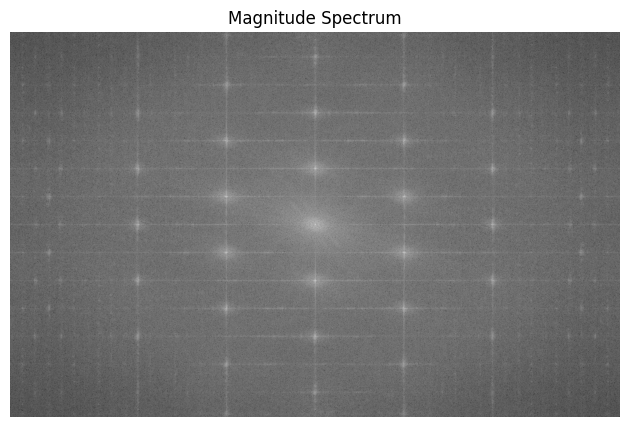

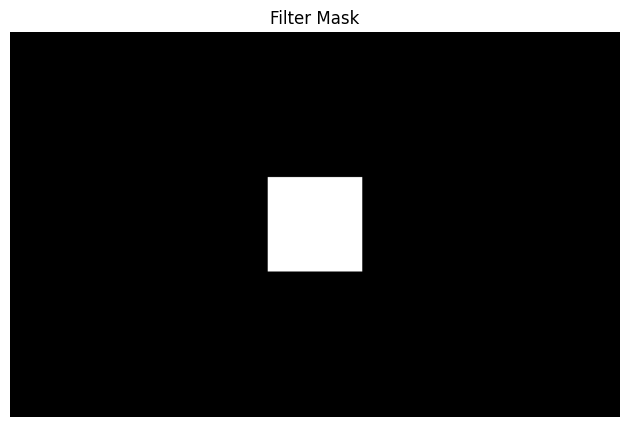

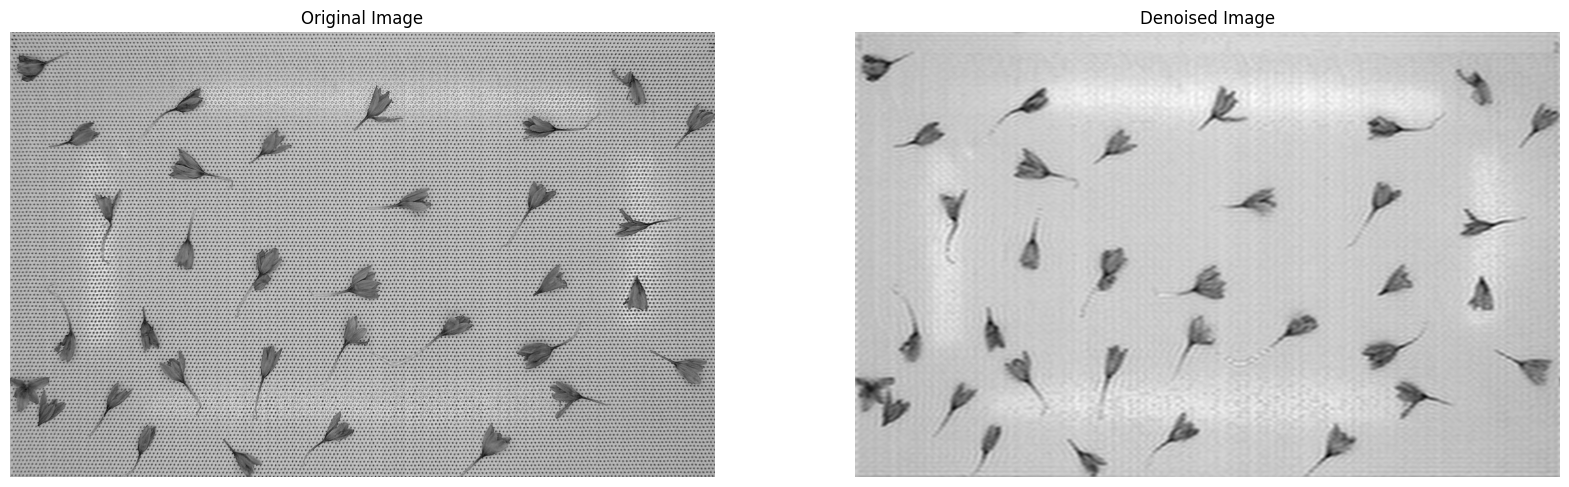

In [4]:
# Set the threshold for noise filtering (adjust as needed)
threshold = 100

# Remove noise
magnitude_spectrum, mask, denoised_image_suffrun = remove_noise(image_saffrun_gray, threshold)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(mask, cmap='gray')
plt.title('Filter Mask')
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_saffrun_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image_suffrun, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

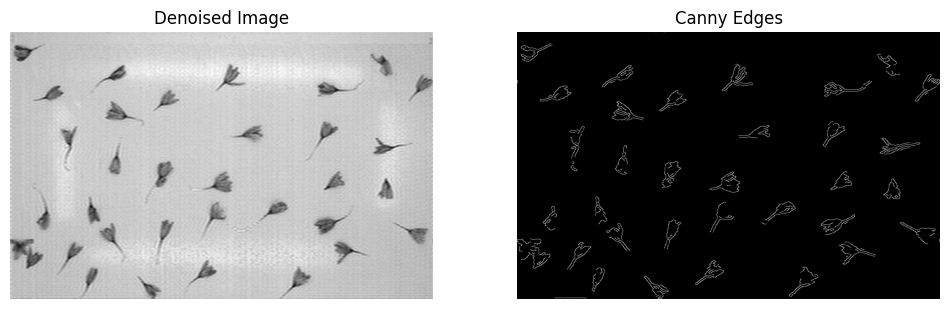

In [5]:
# Apply Canny edge detection
canny_image_suffrun = cv2.Canny(np.uint8(denoised_image_suffrun), 50, 100)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(denoised_image_suffrun, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny_image_suffrun, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

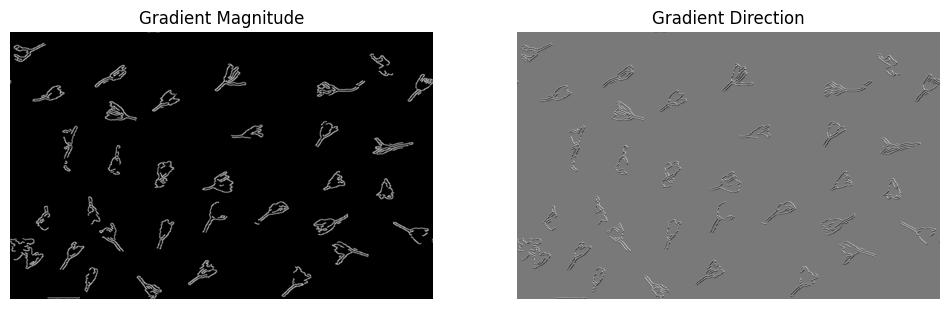

In [6]:
# Calculate gradients in x and y directions using Sobel filter
gradient_x = cv2.Sobel(canny_image_suffrun, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(canny_image_suffrun, cv2.CV_64F, 0, 1, ksize=3)

# Compute magnitude and direction of gradients
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
direction = np.arctan2(gradient_y, gradient_x)

# Display magnitude and direction using plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(direction, cmap='gray')
plt.title('Gradient Direction')
plt.axis('off')

plt.show()